In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import datetime
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import ARIMA

In [2]:
data=pd.read_excel("D:\Self\Data Science\Forecasting\Assignment\Airlines+Data.xlsx")
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
data.shape

(96, 2)

In [4]:
data["Month"]=pd.to_datetime(data['Month'],infer_datetime_format=True)
data=data.set_index(['Month'])
data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


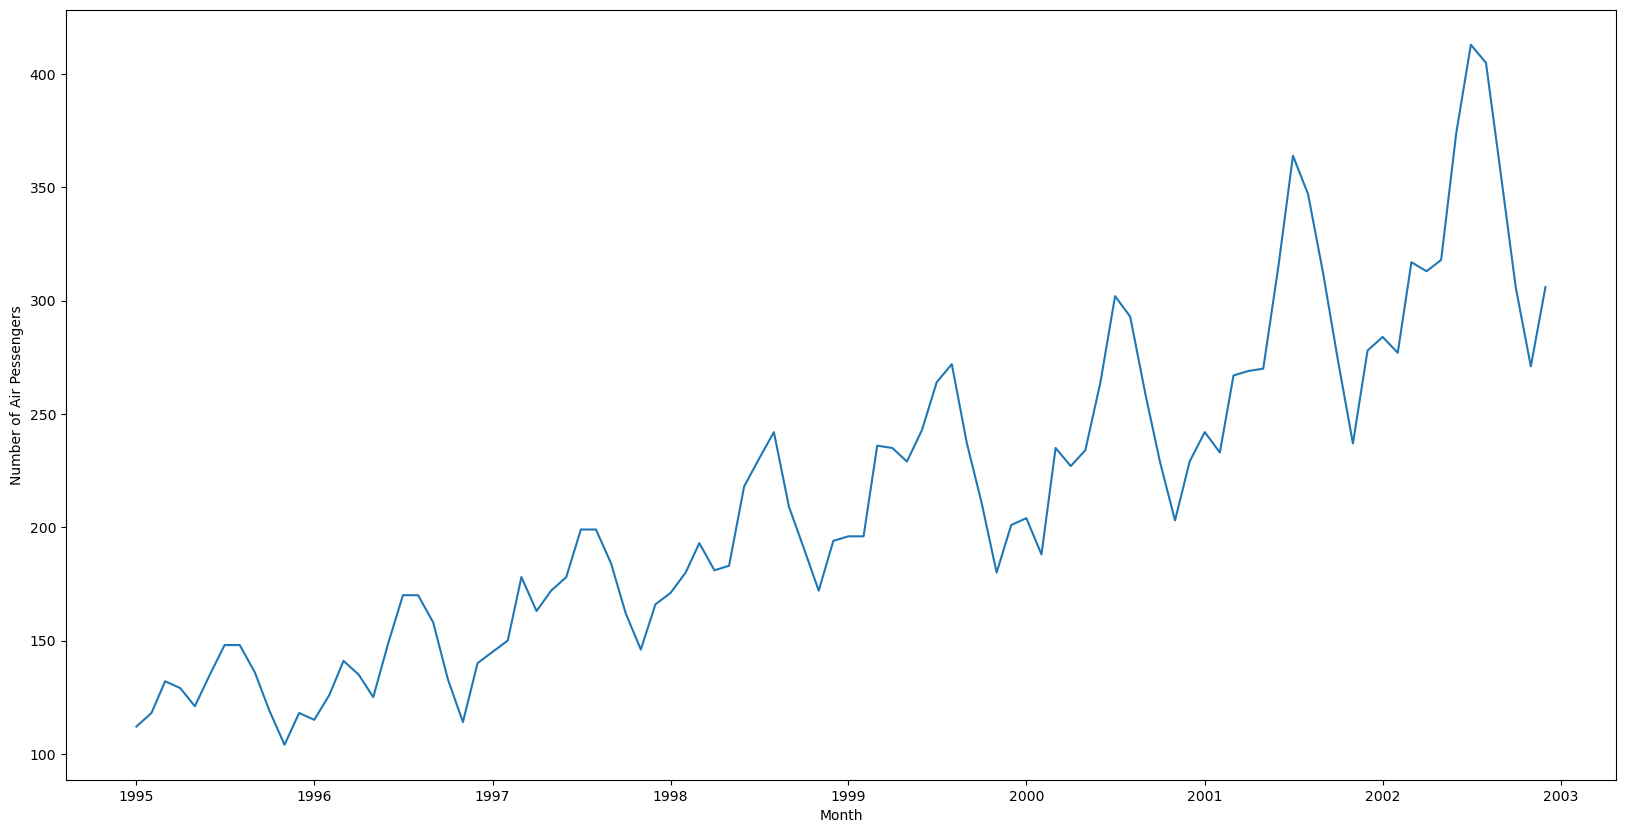

In [5]:
plt.figure(figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Number of Air Pessengers")
plt.plot(data)

In [6]:
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))

            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
1995-06-01         NaN
1995-07-01         NaN
1995-08-01         NaN
1995-09-01         NaN
1995-10-01         NaN
1995-11-01         NaN
1995-12-01  126.666667
1996-01-01  126.916667
1996-02-01  127.583333
1996-03-01  128.333333
            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
1995-06-01         NaN
1995-07-01         NaN
1995-08-01         NaN
1995-09-01         NaN
1995-10-01         NaN
1995-11-01         NaN
1995-12-01   13.720147
1996-01-01   13.453342
1996-02-01   13.166475
1996-03-01   13.686977


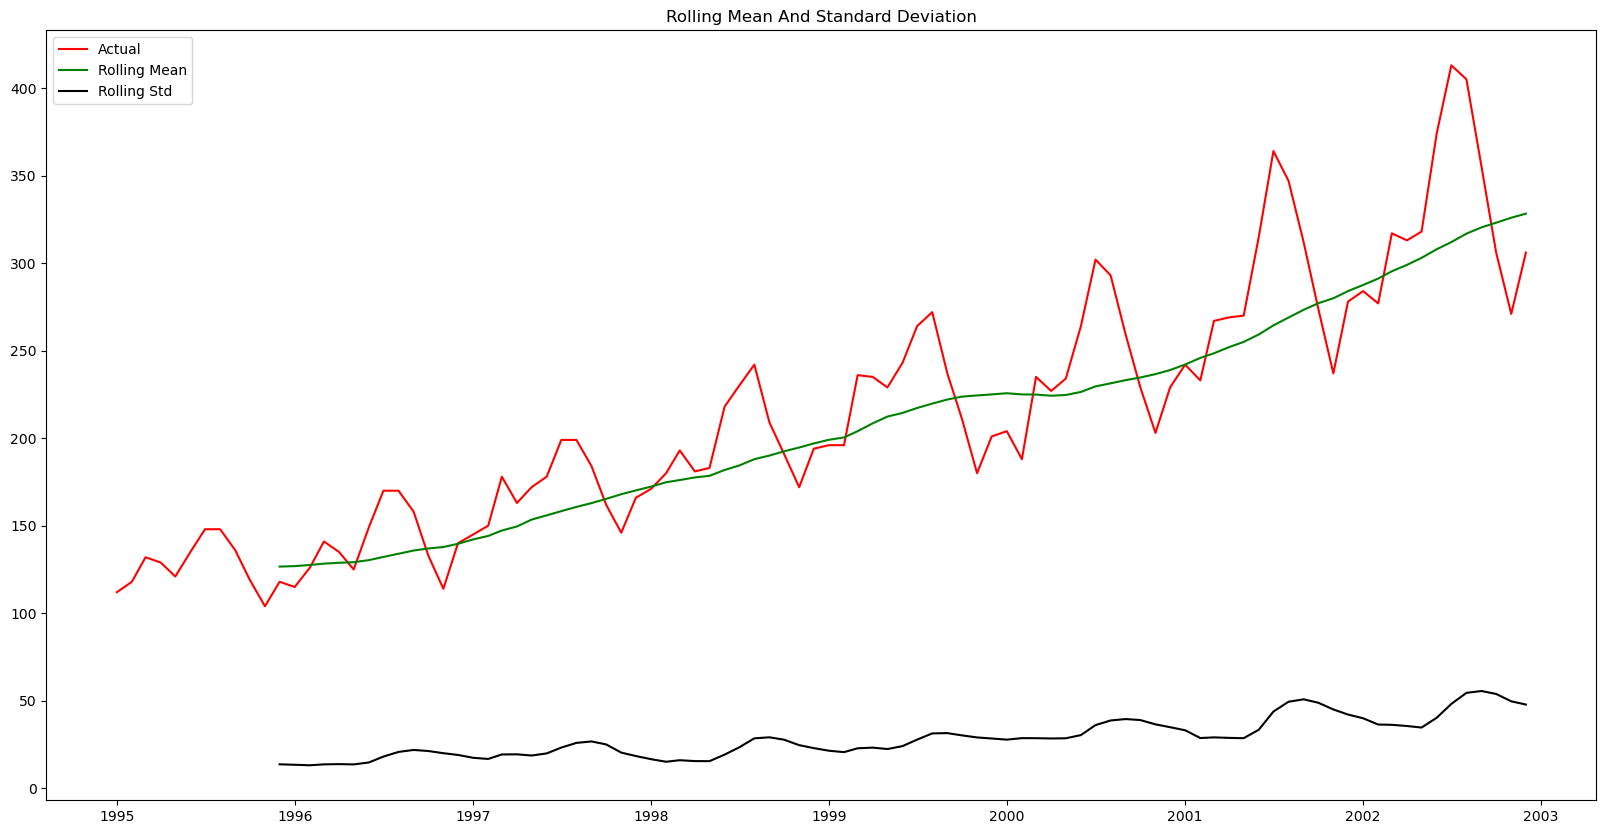

In [7]:
plt.figure(figsize=(20,10))
actual=plt.plot(data,color='red',label='Actual')
mean_6=plt.plot(rolmean,color='green',label='Rolling Mean')
std_6=plt.plot(rolstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean And Standard Deviation')
plt.show (block=False)

In [8]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test.')
dftest=adfuller(data['Passengers'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','p-value','Lags Used','No. of obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value(%s)'%key]=value
print(dfoutput)    

Dickey-Fuller Test.
Test Statistics         1.340248
p-value                 0.996825
Lags Used              12.000000
No. of obs             83.000000
Critical Value(1%)     -3.511712
Critical Value(5%)     -2.897048
Critical Value(10%)    -2.585713
dtype: float64


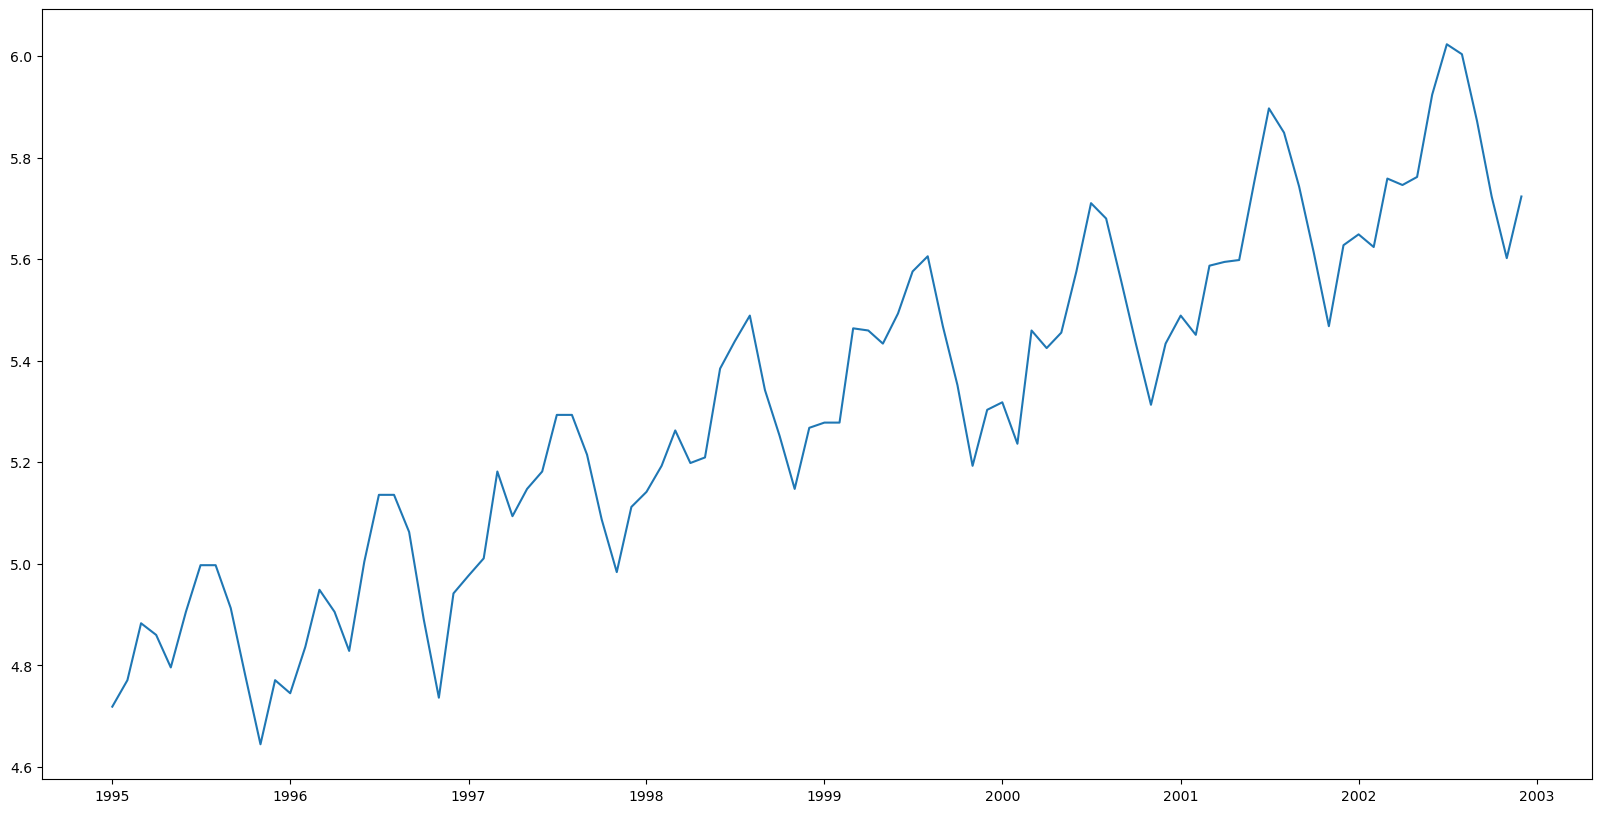

In [9]:
plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)

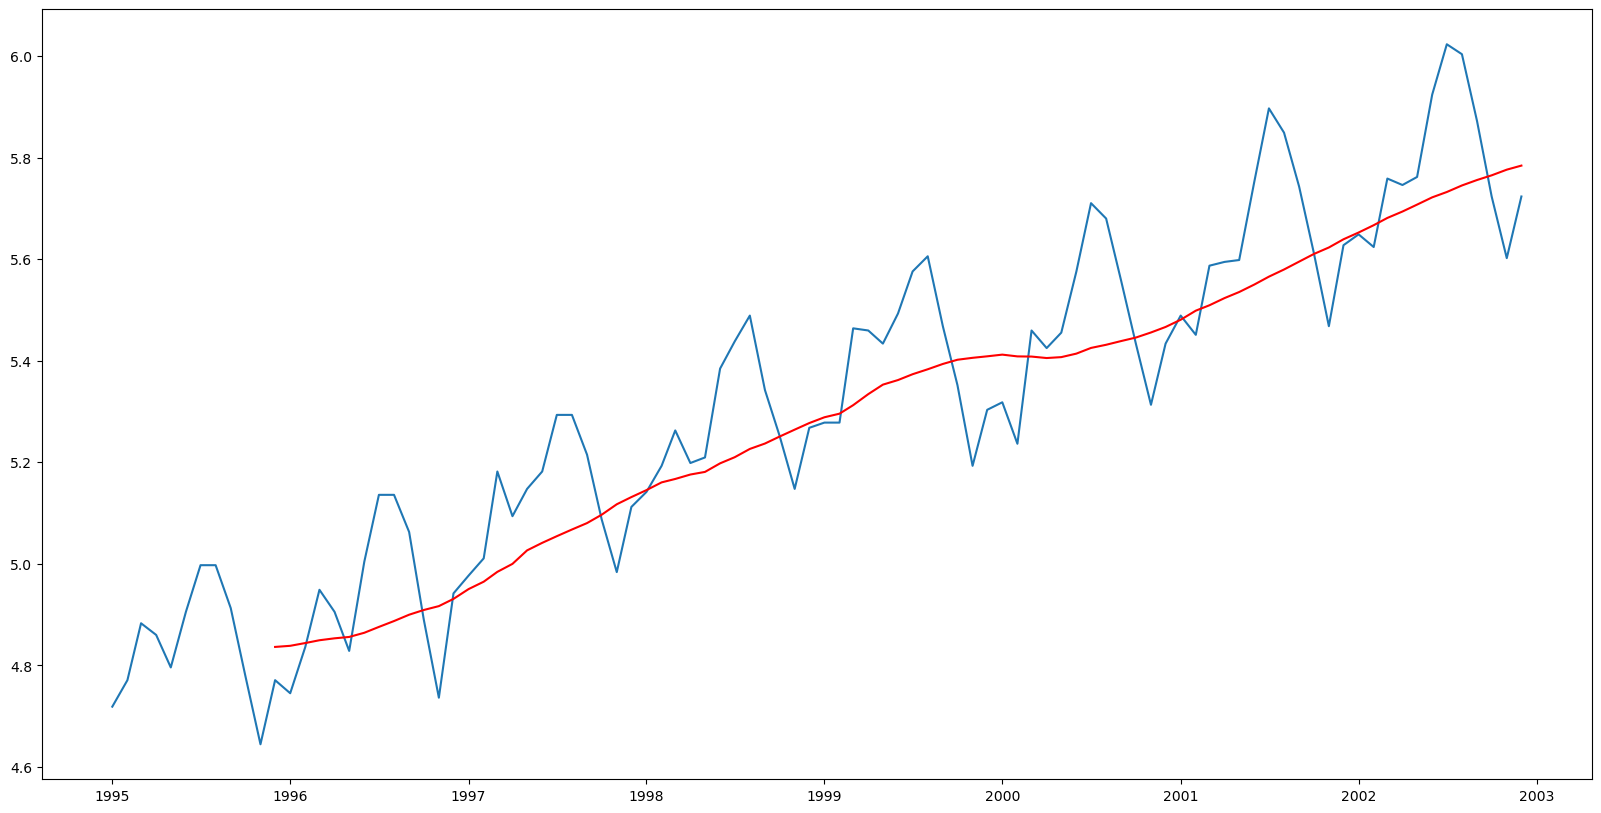

In [10]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg,color='red')


In [11]:
data_log_diff=data_log-MAvg
data_log_diff.head(15)

,Passengers
Month,
1995-01-01,NaN
1995-02-01,NaN
1995-03-01,NaN
1995-04-01,NaN
1995-05-01,NaN
1995-06-01,NaN
1995-07-01,NaN
1995-08-01,NaN
1995-09-01,NaN


In [12]:
data_log_diff=data_log_diff.dropna()
data_log_diff.head()

,Passengers
Month,
1995-12-01,-0.065494
1996-01-01,-0.093449
1996-02-01,-0.007566
1996-03-01,0.099416
1996-04-01,0.052142


In [13]:
def stationarity (timeseries):
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries,color='red',label='Actual')
    mean_6=plt.plot(rolmean,color='green',label='Rolling Mean')
    std_6=plt.plot(rolstd,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean And Std Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test:')
    dftest=adfuller(timeseries['Passengers'],autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','Lags Used','No.of Obs'])
    for Key,value in dftest[4].items():
        dfoutput['Critical Value(%s)'%key] = value
    print (dfoutput)

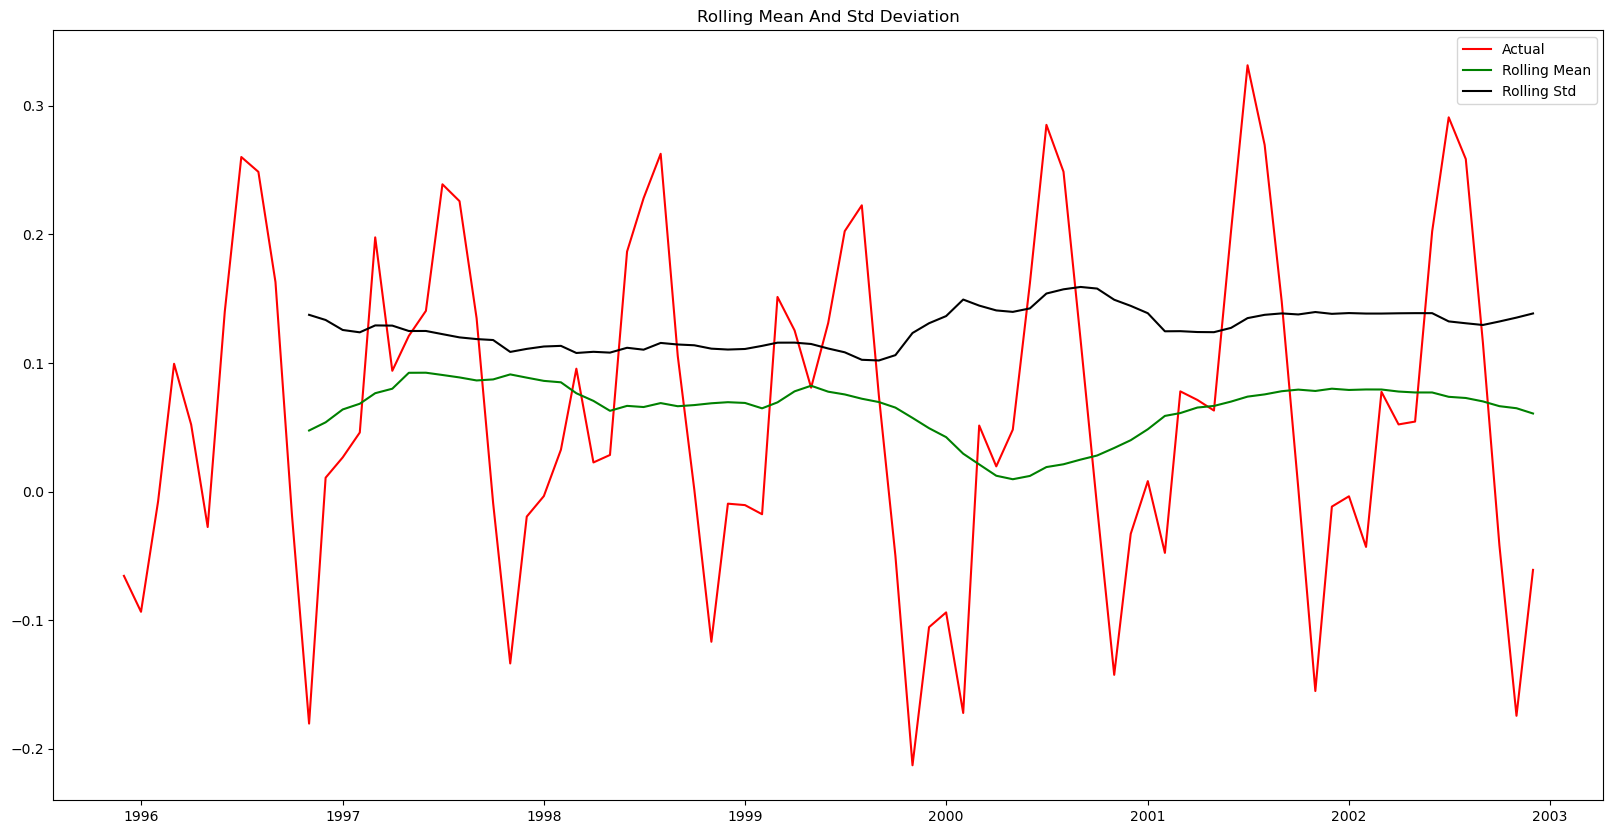

Dickey-Fuller Test:
Test Statistic         -1.910930
p-value                 0.326937
Lags Used              12.000000
No.of Obs              72.000000
Critical Value(10%)    -2.588679
dtype: float64


In [14]:
stationarity(data_log_diff)

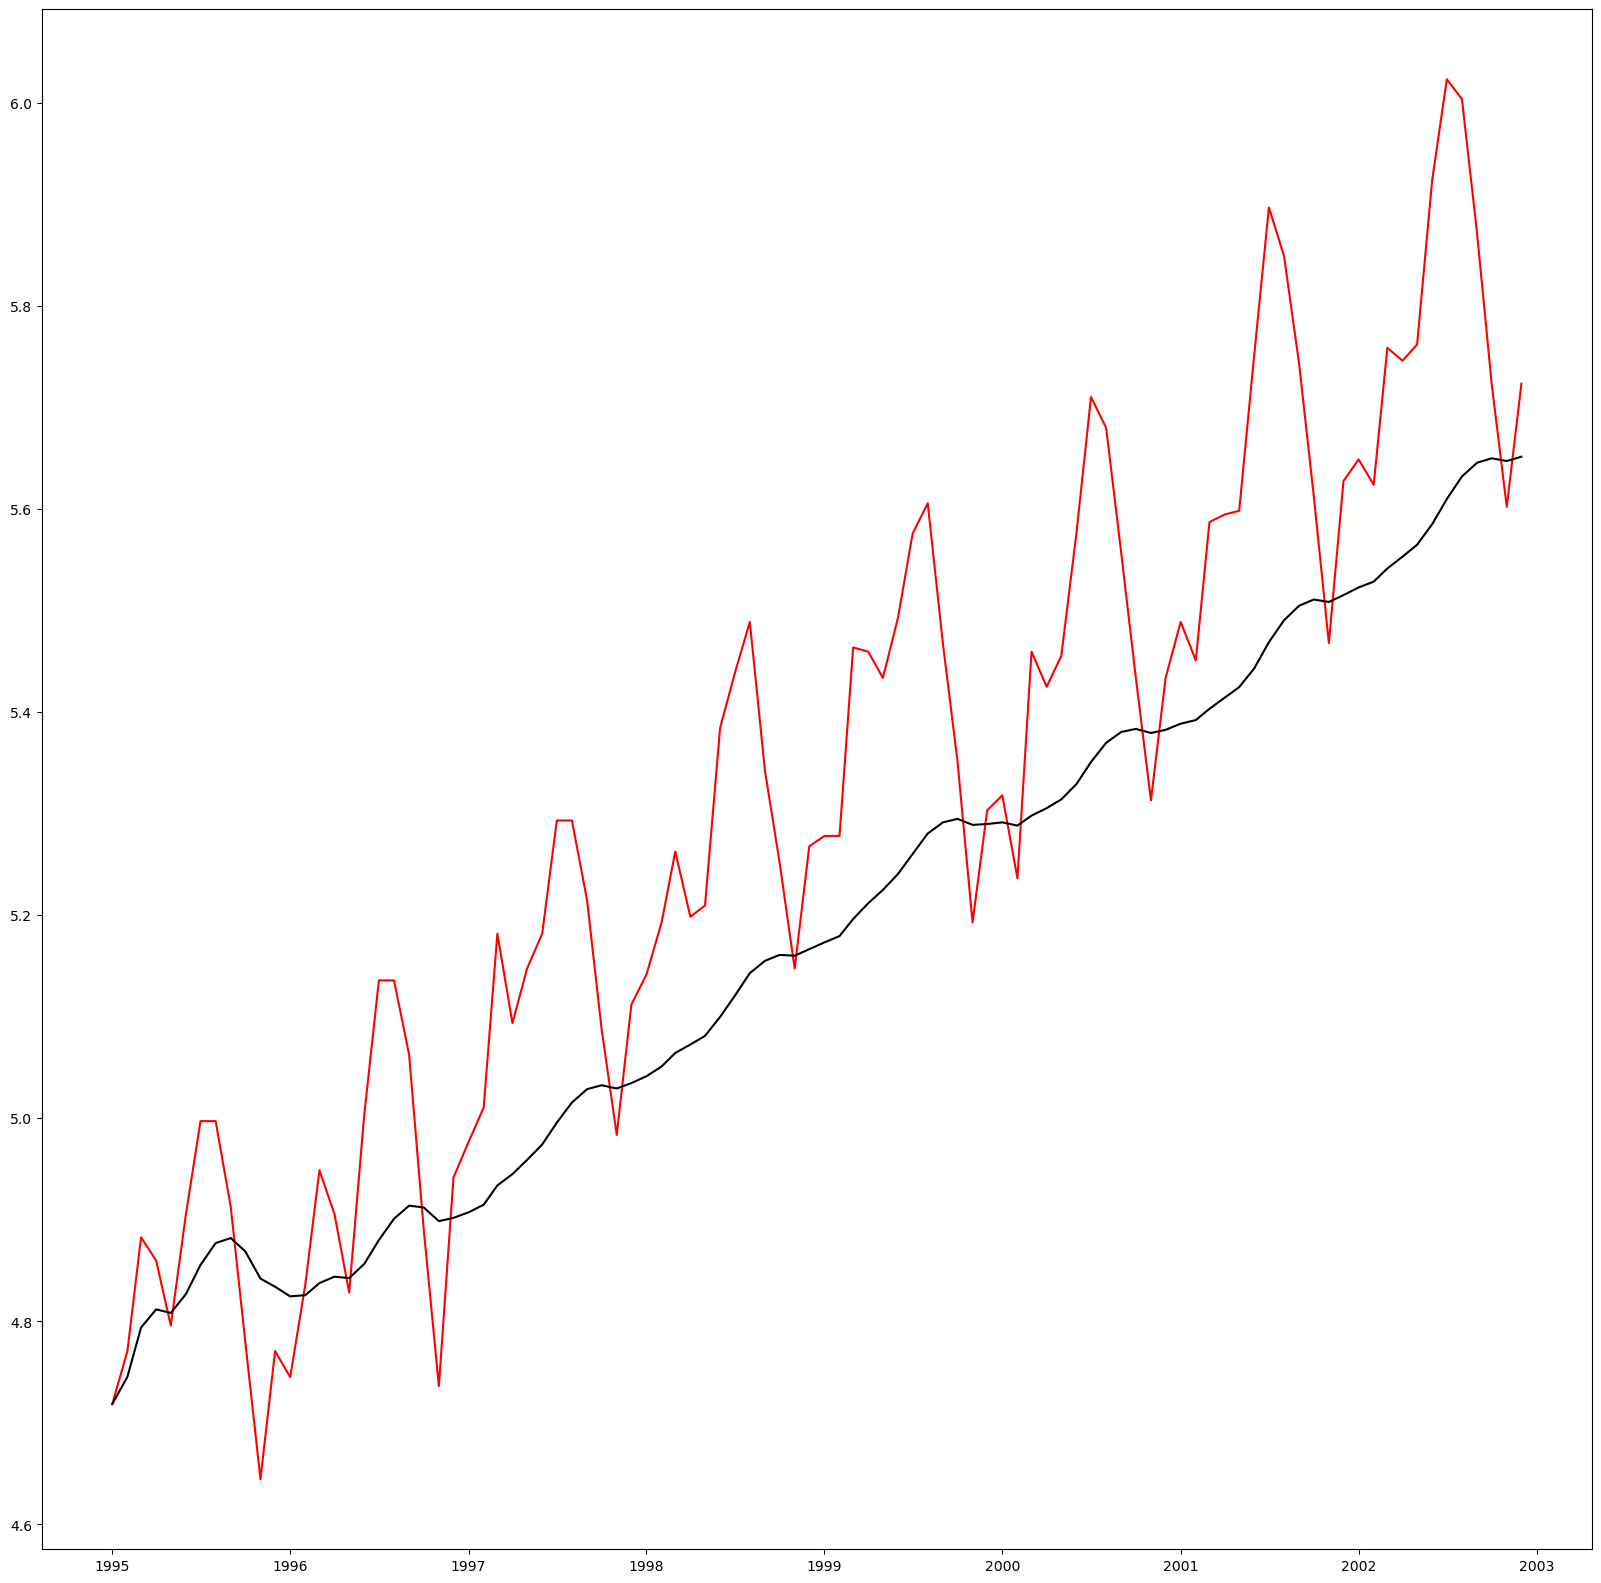

In [15]:
plt.figure(figsize=(20,20))
exp_data=data_log.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(data_log,color='red')
plt.plot(exp_data,color='black')

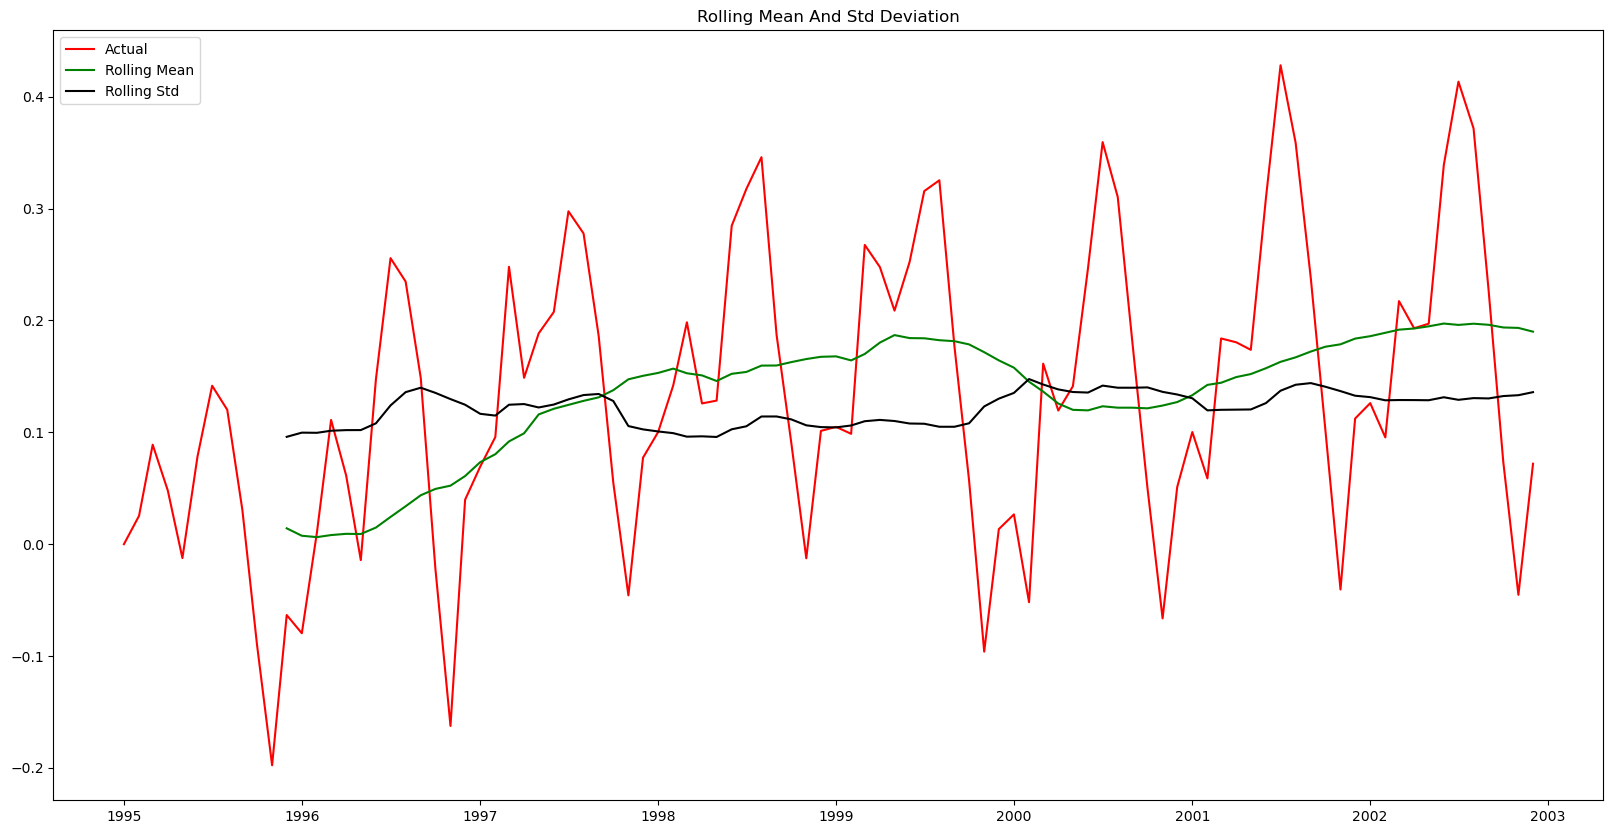

Dickey-Fuller Test:
Test Statistic         -2.835036
p-value                 0.053441
Lags Used              12.000000
No.of Obs              83.000000
Critical Value(10%)    -2.585713
dtype: float64


In [16]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

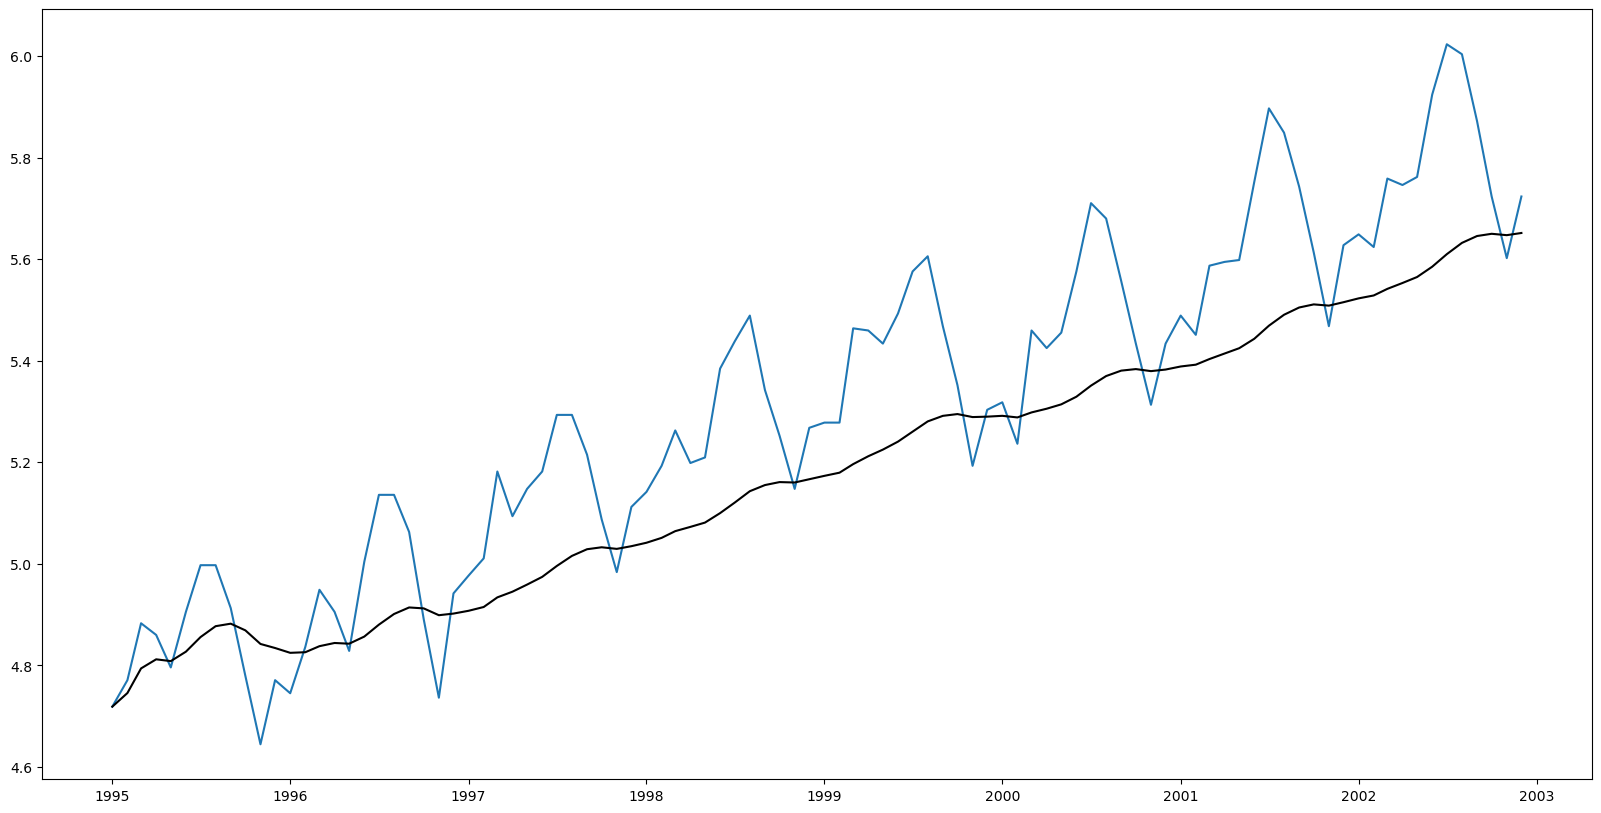

In [17]:
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data,color='black')

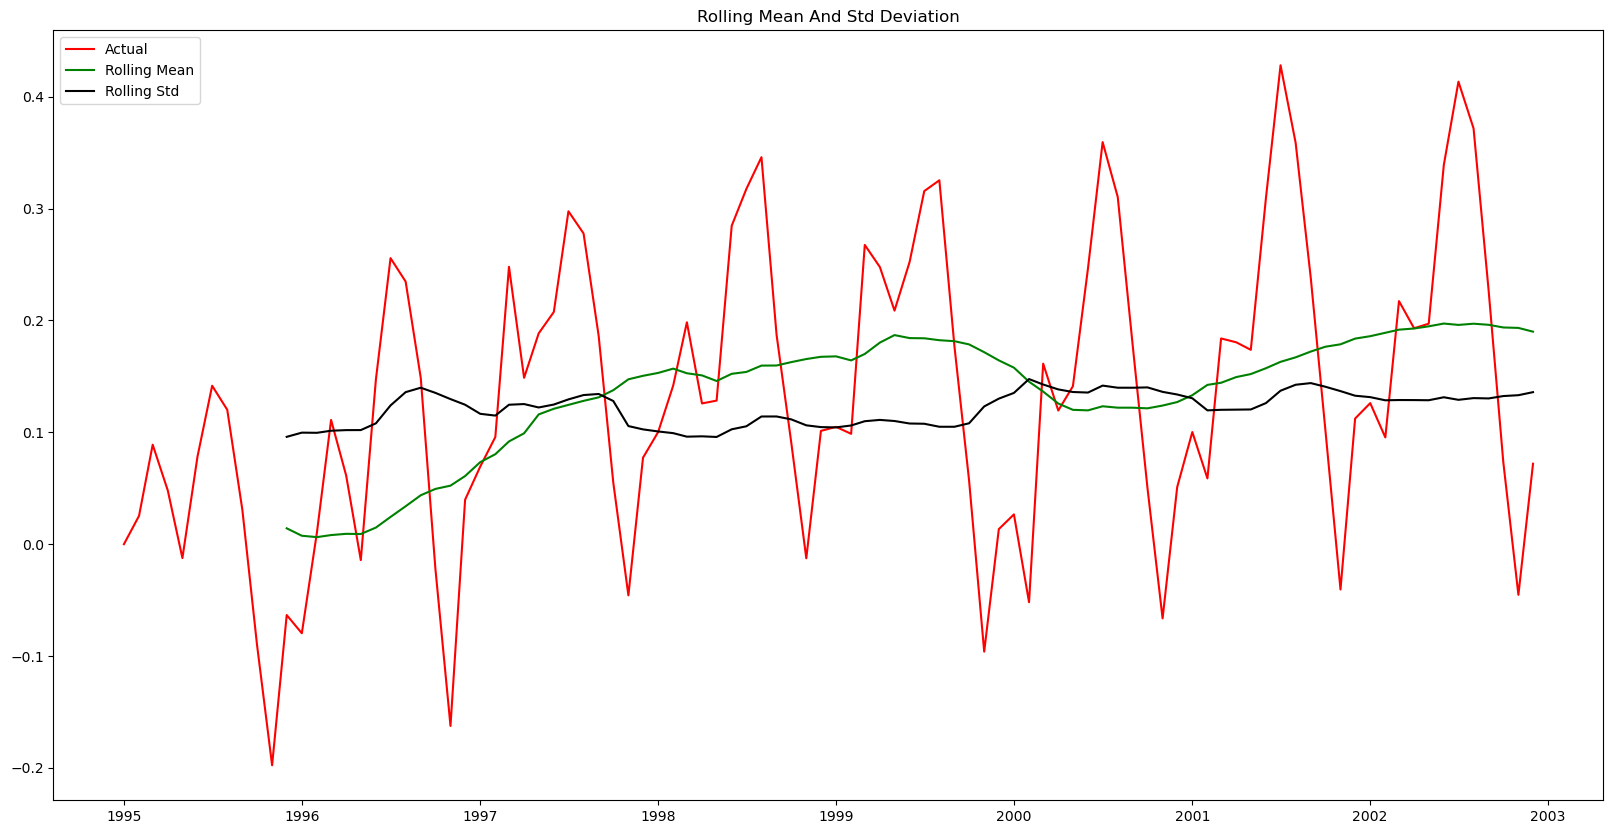

Dickey-Fuller Test:
Test Statistic         -2.835036
p-value                 0.053441
Lags Used              12.000000
No.of Obs              83.000000
Critical Value(10%)    -2.585713
dtype: float64


In [18]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

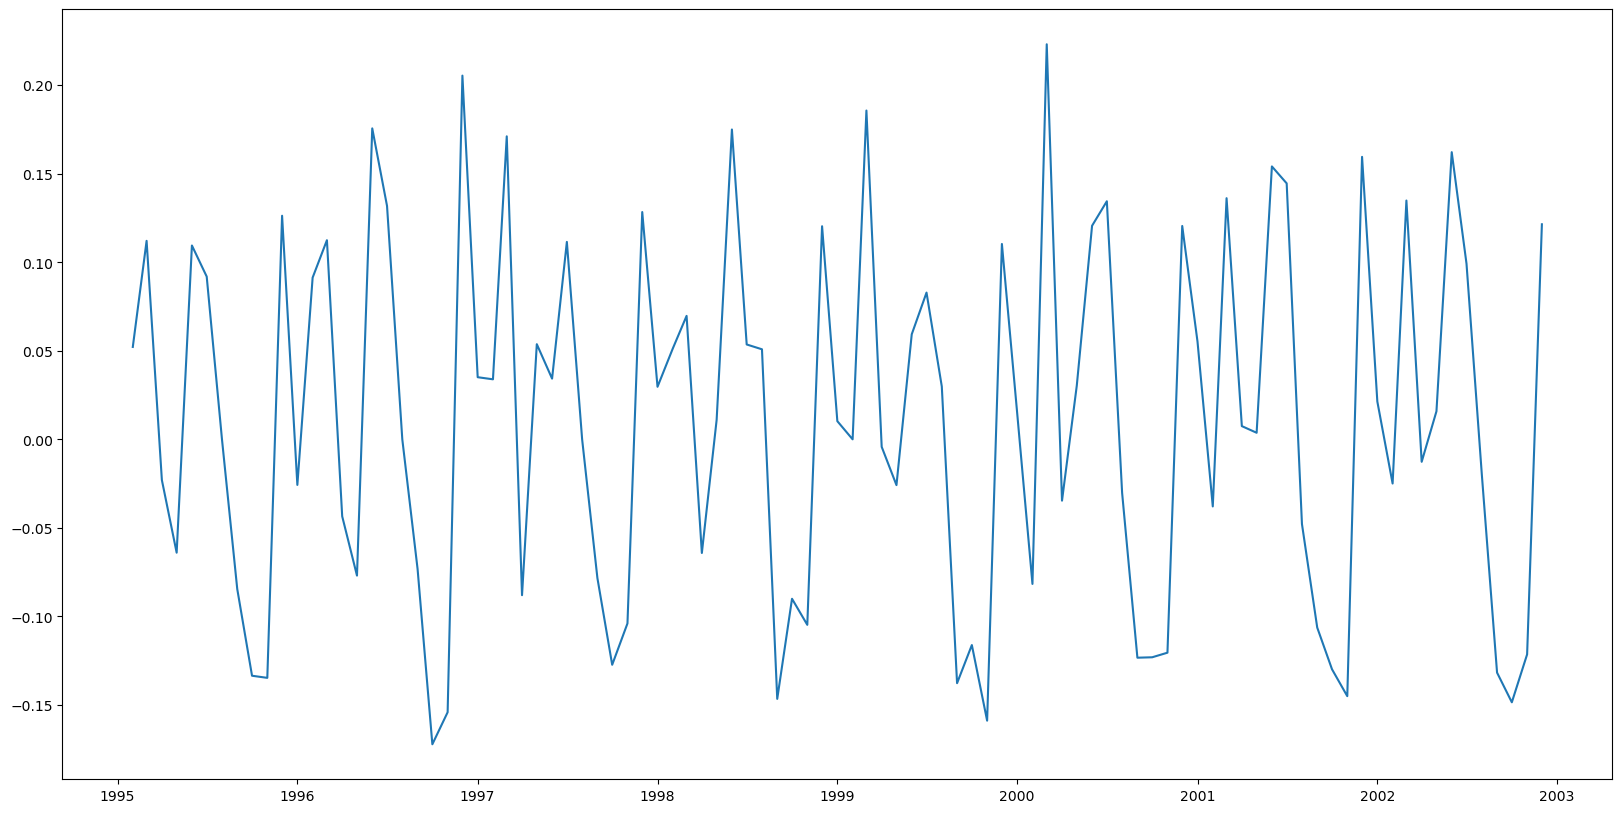

In [19]:
plt.figure(figsize=(20,10))
data_shift=data_log-data_log.shift()
plt.plot(data_shift)

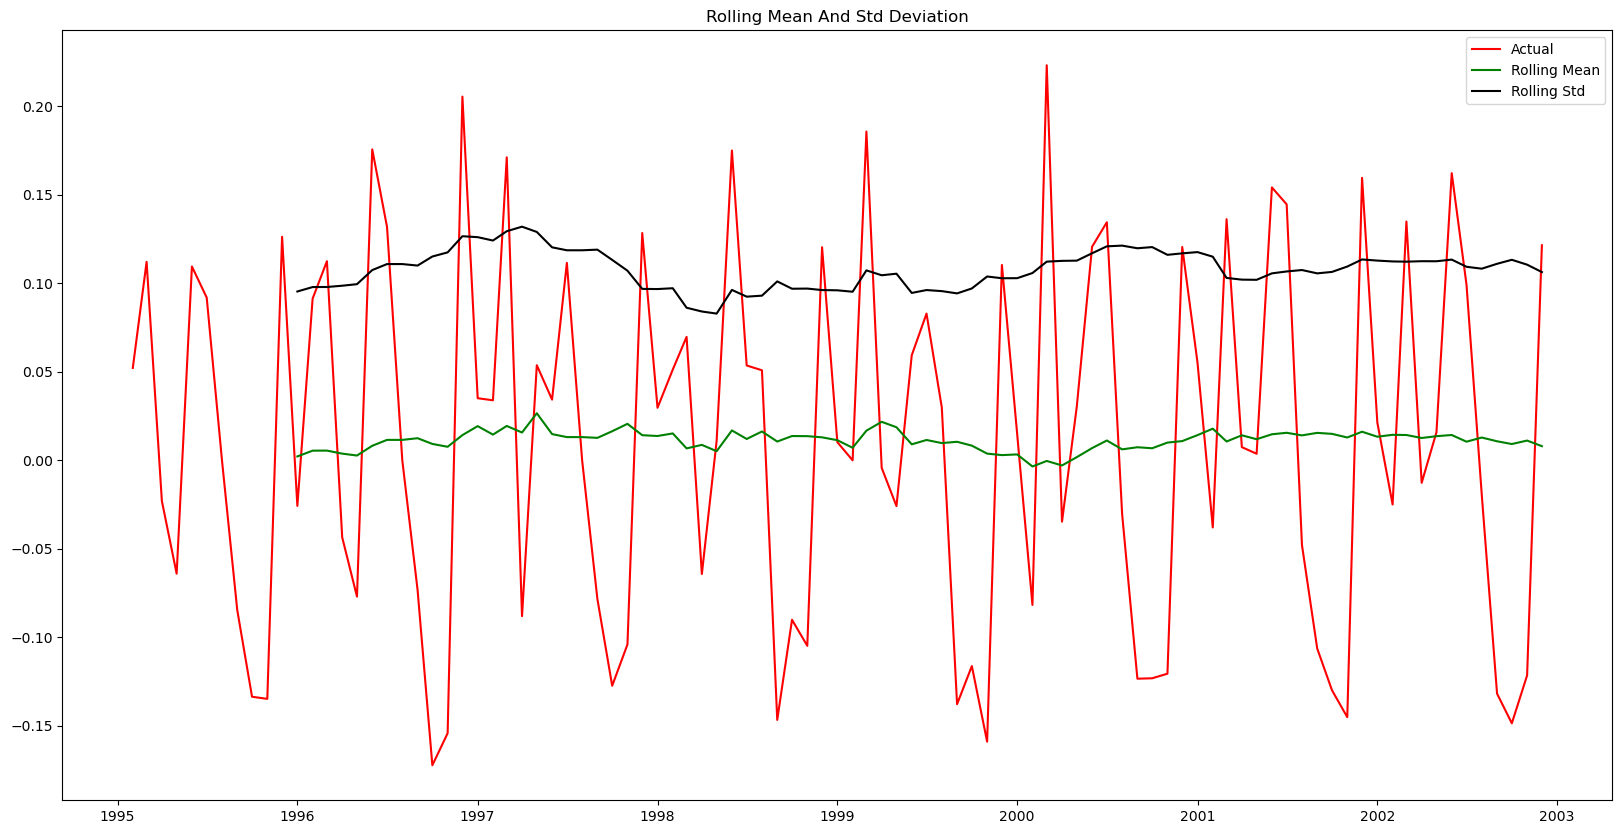

Dickey-Fuller Test:
Test Statistic         -2.670823
p-value                 0.079225
Lags Used              12.000000
No.of Obs              82.000000
Critical Value(10%)    -2.585949
dtype: float64


In [20]:
data_shift=data_shift.dropna()
stationarity(data_shift)

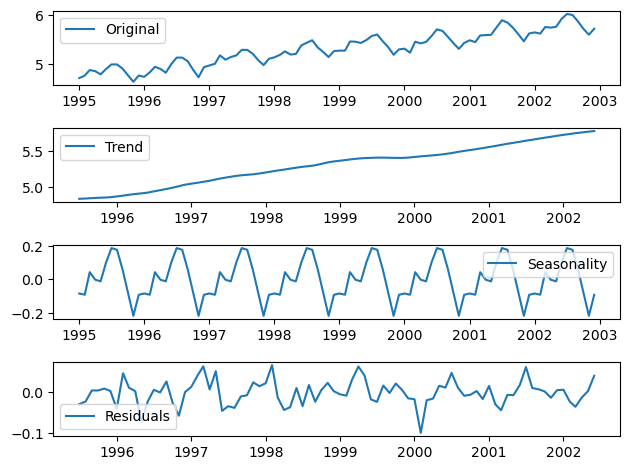

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_log,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

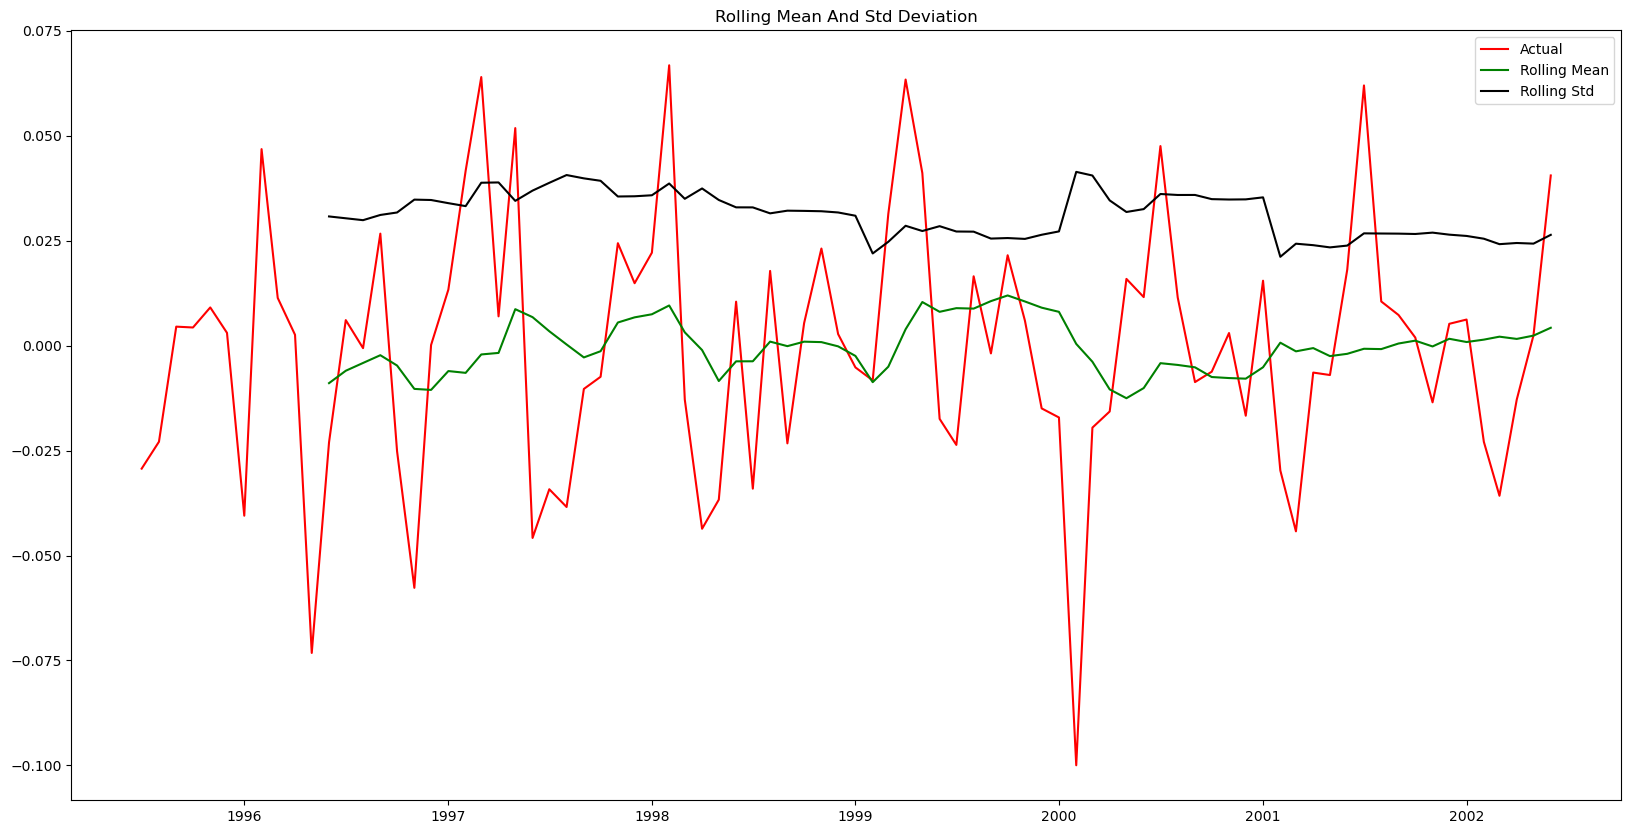

Dickey-Fuller Test:


KeyError: 'Passengers'

In [22]:
decomp_data=residual
decomp__data=decomp_data.dropna()
stationarity(decomp_data)

Text(0.5, 1.0, 'Autocorrelation Function')

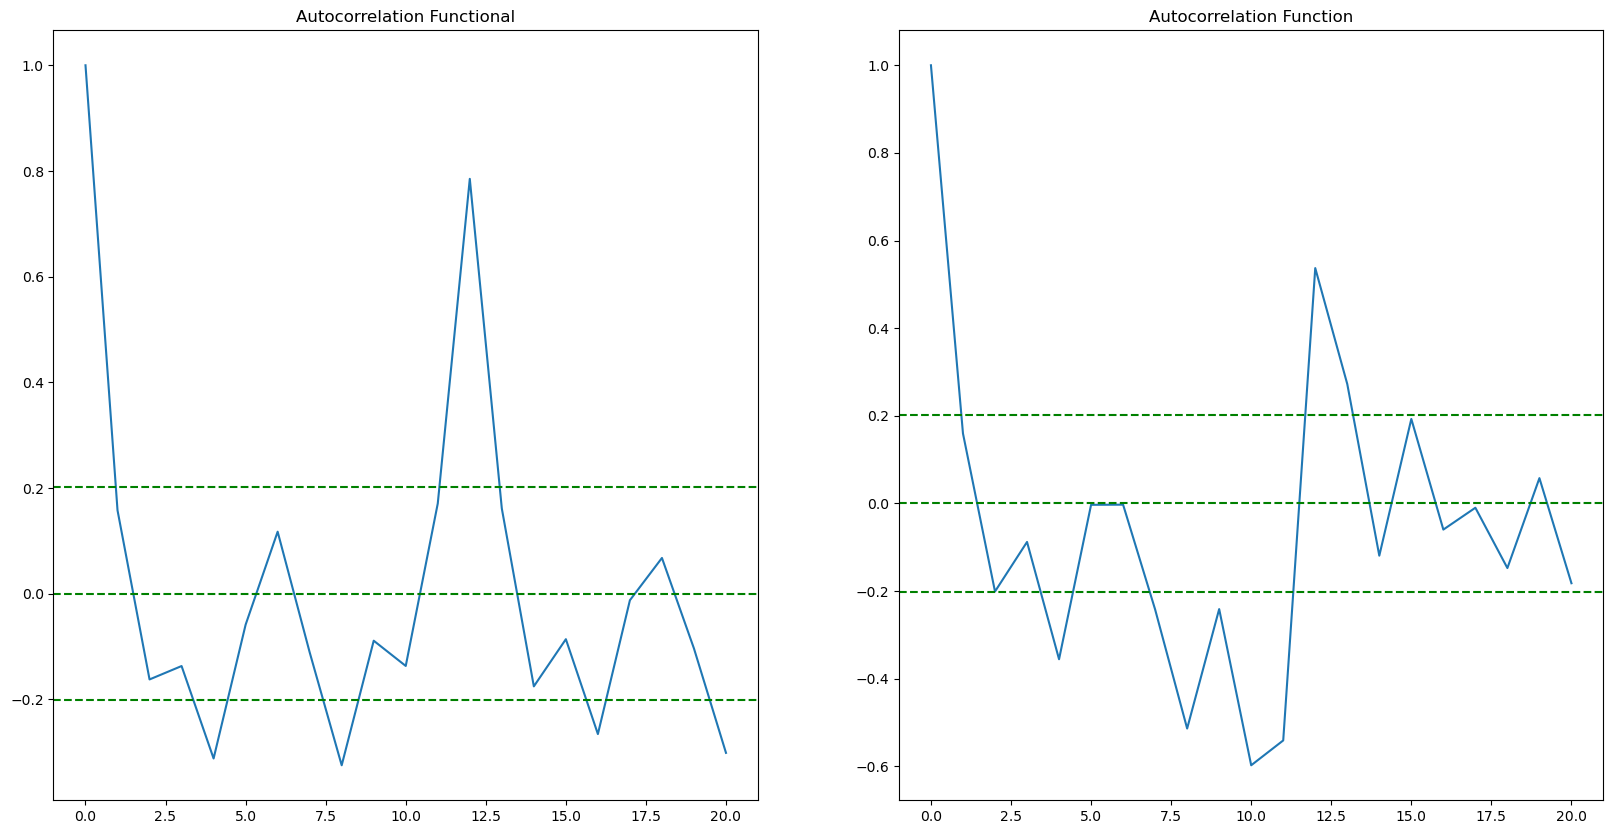

In [23]:
lag_acf=acf(data_shift,nlags=20)
lag_pacf=pacf(data_shift,nlags=20,method='ols')
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Functional')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

### Arima Model

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


plotting ARIMA model


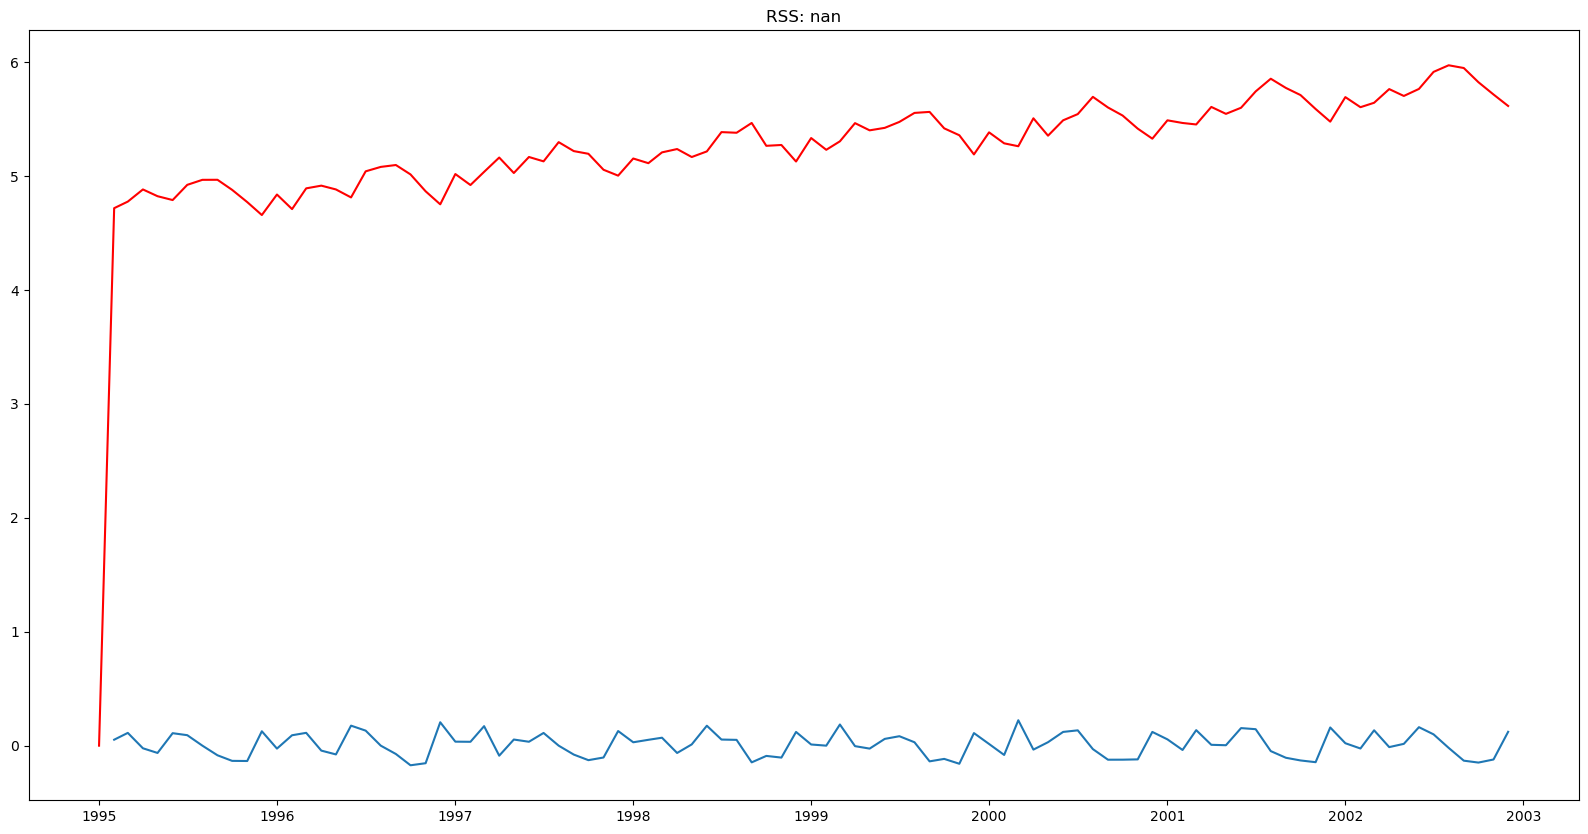

In [31]:
from statsmodels.tsa.arima.model import ARIMA
plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,2))
results=model.fit()
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['Passengers'])**2))
print('plotting ARIMA model')

In [32]:
fitted_values=results.fittedvalues
predictions=pd.Series(fitted_values, copy=True)
print(predictions.head())

Month
1995-01-01    0.000000
1995-02-01    4.718499
1995-03-01    4.776291
1995-04-01    4.882909
1995-05-01    4.823605
dtype: float64


In [33]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

Month
1995-01-01     0.000000
1995-02-01     4.718499
1995-03-01     9.494790
1995-04-01    14.377698
1995-05-01    19.201304
dtype: float64


In [34]:
predictions_log=pd.Series(data_log['Passengers'])
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

Month
1995-01-01     4.718499
1995-02-01     9.489184
1995-03-01    14.377592
1995-04-01    19.237511
1995-05-01    23.997094
dtype: float64

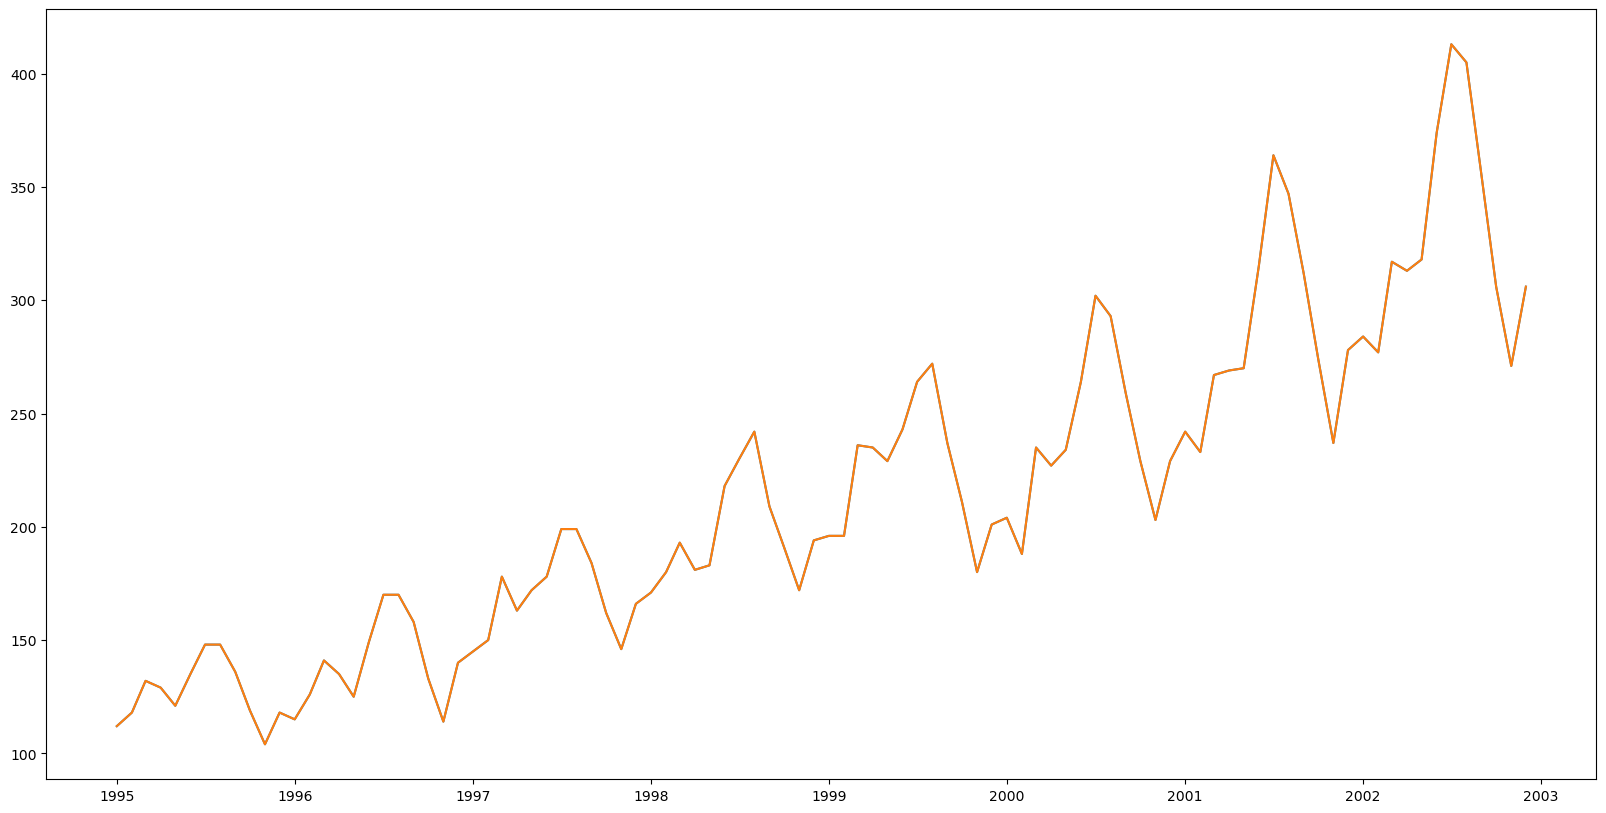

In [35]:
predictions_ARIMA=np.exp(pd.Series(data_log['Passengers']))
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)

In [37]:
results.forecast(steps=120)

2003-01-01    5.785477
2003-02-01    5.763412
2003-03-01    5.768748
2003-04-01    5.766117
2003-05-01    5.766367
                ...   
2012-08-01    5.765646
2012-09-01    5.765646
2012-10-01    5.765646
2012-11-01    5.765646
2012-12-01    5.765646
Freq: MS, Name: predicted_mean, Length: 120, dtype: float64